# Computing hodge vectors of divisors on CY3s

This notebook returns hodge vectors of divisors corresponding to a choice of lattice points on some example 2-faces of 4d reflexive polytopes (Delaunay triangulated).
Let $$D=\sum_{i=0}^3 a_iD_i,$$ where $a_i\in \{0,1,2,3,4,5,6\}$ and $D_i$ are prime toric divisors on a smooth $CY_3$, $X$, (arising as a hypersurface in toric variety $V$). 
In the following, we return $$h^{0,i}(D)=h^{i}(D,\mathcal{O}_D)=h^{i}(\mathcal{O}_D), i=0,1,2.$$ Slightly abusing notation, we write this as $$h^\bullet(D).$$
Data provided here was obtained via [CohomCalg](https://github.com/BenjaminJurke/cohomCalg).

# 1. Loading the data and defining functions

##  (Just shift-enter through this section)

In [708]:
import numpy as np
import pandas as pd
# import holoviews as hv
import networkx as nx
# from holoviews import opts
# import hvplot.networkx as hvnx
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
import csv

defaults = dict(width=400, height=400)


In [709]:
#Given a text file of hodge vector data, read and store this data in the form of a dictionary (divisor coeffs->keys, hodge vecs->values)
def data_extraction(txtfile):
    with open(str(txtfile)) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        Charges=[]
        Hodgevecs=[]
        for row in csv_reader:
            acharge=row[0][1:-1]
            charge=[int(s) for s in acharge.split(',')]
            Charges.append(np.array(charge))
            ahvec=row[1][1:-1]
            try:
                hvec=[int(s) for s in ahvec.split(',')]
            except:
                hvec=["Undef"]
            Hodgevecs.append(np.array(hvec))
            line_count += 1
#         print(f'Processed {line_count} lines.')
    data=[(Charges[i],Hodgevecs[i]) for i in range(len(Charges)) ]
    divdata={tuple(d[0]):tuple(d[1])  for d in data}
    return divdata

In [710]:
exface1=data_extraction('exface1to6.txt') #storing hodge vector data for 2-face from example poly 1

In [711]:
#face_data (interior points, genera) of 2-face and subfaces - data obtained from cytools
def face_data(exface):
    if exface==exface1:
        fd=np.array([['Dimension','Face','# Interior Pts', 'Genus'],[0,[0],0,0],[0,[1],0,1],[0,[2],0,30],
                      [1,[0,1],0,0],[1,[1,2],0,6],[1,[0,2],1,0] , [2,[0,1,2],0,4]])
        df=pd.DataFrame(data=fd[0:,0:], index=["" for i in range(8)], columns=["","", "", ""])
    return df

In [712]:
def hvecs_exface1(c, show_graphs=True):
    if not isinstance(c,tuple):
        return "Invalid input: Provide input as 4-tuple, e.g. (1,0,0,0)"
    for el in c:
        if el>6:
            return "All coefficients must take values in {0,1,2,3,4,5,6}"
    if isinstance(exface1[c][0],str):
        return "CohomCalg doesn't have an answer"
    hvec=str(exface1[c])
    Active_nodes=[]
    Passive_nodes=[]
    for i in range(len(c)):
        if c[i]!=0:
            Active_nodes.append(i)
        else:
            Passive_nodes.append(i)
    div=""
    if len(Active_nodes)!=0:
        for i in Active_nodes:
            if c[i]==1:
                div=div+'D_'+str(i)+'+'
            else:
                div=div+str(c[i])+'D_'+str(i)+'+'
    else:
        div="00"
        
    if show_graphs==False:
        return display(Math(r'h^{\bullet}'+'('+str((div[:-1]))+')'+'='+str(hvec)))
    
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(5,5), dpi=150)
    ax = axes.flatten()
    pos = {0: (0,1),1:(6,0), 2:(0,-1), 3: (0,0)}
    pos2={0: (0,1),1:(4,0), 2:(0,-1)}

#   construction of hodge vector graph, G
    G = nx.Graph()
    nx.draw_networkx_nodes(G,pos,
                       nodelist=Active_nodes,
                       node_color='r',
                       node_size=500,
                   alpha=0.95, ax=ax[0])
    nx.draw_networkx_nodes(G,pos,
                       nodelist=Passive_nodes,
                       node_color='yellow',
                       node_size=500,
                   alpha=0.99,ax=ax[0])

    nx.draw_networkx_edges(G,pos,
                       edgelist=[(0,1),(1,2),(2,3),(3,0)],
                       width=8,alpha=1,edge_color='indigo',ax=ax[0])
    nx.draw_networkx_edges(G,pos,
                       edgelist=[(3,1)],
                       width=4,alpha=0.9,edge_color='grey',ax=ax[0])
    labels={}
    for i in range(4):
        labels[i]=r'$\mathbf{'+str(c[i])+'}$'

    nx.draw_networkx(G,pos, ax=ax[0])
    nx.draw_networkx_labels(G,pos,ax=ax[0],labels=labels,font_size=16)
    ax[0].set_axis_off()
        
#     constructing 2-face graph w genera
    H=nx.Graph()
    labels2={}
    for i in range(4):
        labels2[i]=i
        
    nx.draw_networkx_nodes(H,pos,
                       nodelist=[0,1,2],
                       node_color='lightblue',
                       node_size=500,
                   alpha=0.95, ax=ax[1])
    nx.draw_networkx_nodes(H,pos,
                       nodelist=[3],
                       node_color='green',
                       node_size=350,
                   alpha=0.95, ax=ax[1])
    
    nx.draw_networkx_edges(H,pos,
                       edgelist=[(0,1),(1,2),(2,3),(3,0)],
                       width=8,alpha=1,edge_color='indigo',ax=ax[1])
    nx.draw_networkx_edges(H,pos,edgelist=[(1,3)],
                       width=.8,alpha=1,edge_color='white',ax=ax[1])
    nx.draw_networkx(H,pos, ax=ax[1])
    nx.draw_networkx_labels(H,pos, ax=ax[1],font_size=16, labels=labels2)
    ax[1].set_axis_off()
    
    plt.subplots_adjust(left=-1, bottom=None, right=None, top=None, wspace=.4, hspace=None)
    ax[0].margins(.05,.3)
    ax[1].margins(.05,.3)
    ax[0].set_title('Divisor Representation on 2-face', fontsize=15)
#     ax[0].text(1,1.45,r'$h^{\bullet}$'+'('+str((div[:-1]))+')'+'='+str(hvec), fontsize=15)
    ax[0].text(-.4,-1.7, 'Labels in nodes are coefficients of associated divisors', fontsize=12)

    ax[1].set_title('2-face w/ Genera', fontsize=15)
    ax[1].text(-0.4, 1.2, r'$g(0)=\mathbf{0}$', fontsize=14)
    ax[1].text(5.7, .2, r'$g(1)=\mathbf{1}$', fontsize=14)
    ax[1].text(-0.6, -1.3, r'$g(2)=\mathbf{30}$', fontsize=14)
    ax[1].text(2, -0.05, r'$g(012)=\mathbf{4}$', fontsize=14)
    ax[1].text(-1.8, 0.2, r'$g(02)=\mathbf{0}$', fontsize=14)
    ax[1].text(2.7, .7, r'$g(01)=\mathbf{0}$', fontsize=14)
    ax[1].text(2.7,-.7, r'$g(12)=\mathbf{6}$', fontsize=14)
    ax[1].text(1,-1.7, 'Labels in nodes refer to node IDs', fontsize=12)

    fig.suptitle(display(Math(r'h^{\bullet}'+'('+str((div[:-1]))+')'+'='+str(hvec))))
    plt.axis('off')

#     plt.savefig("labels_and_colors.png") 
    plt.show() # display
  

# 2. Computation

## Example

In [734]:
#face data for reference
face_data(exface1)

,,,,
,Dimension,Face,# Interior Pts,Genus
,0,[0],0,0
,0,[1],0,1
,0,[2],0,30
,1,"[0, 1]",0,0
,1,"[1, 2]",0,6
,1,"[0, 2]",1,0
,2,"[0, 1, 2]",0,4


<IPython.core.display.Math object>

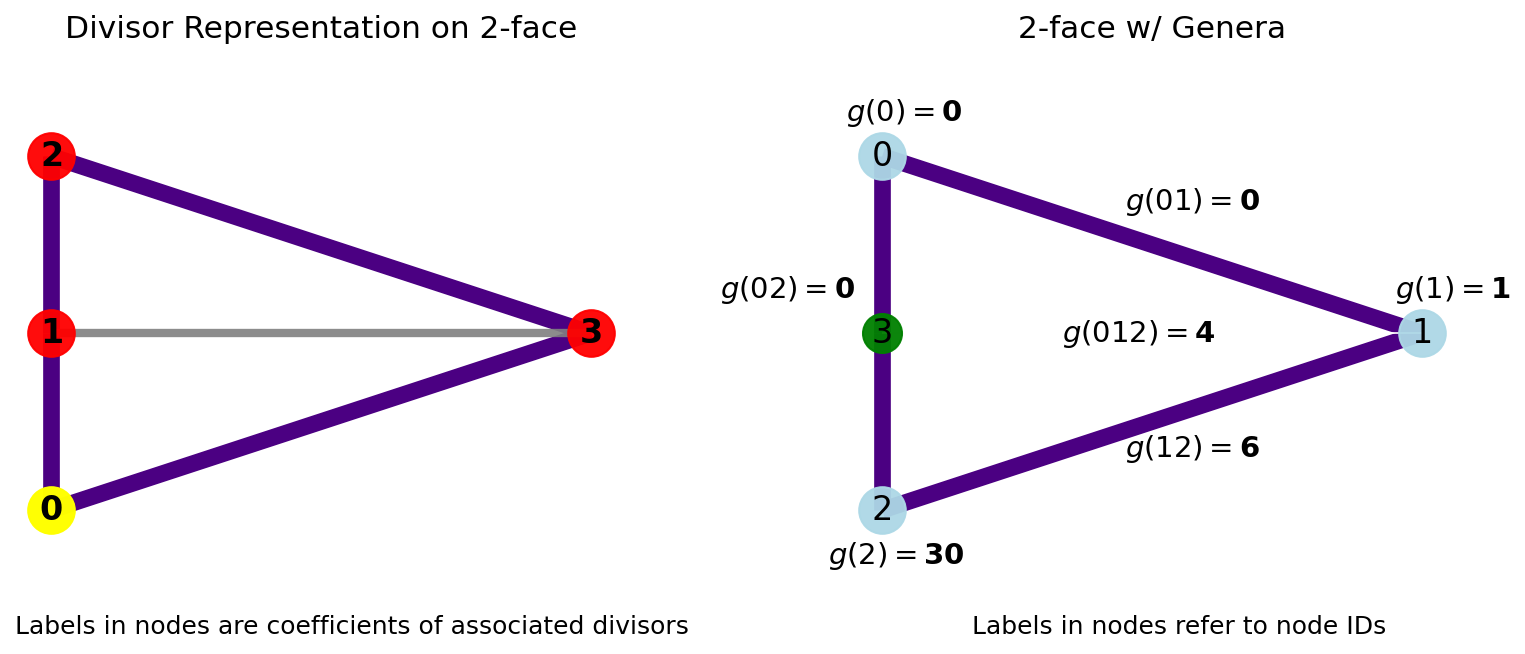

In [735]:
#input should be 4-tuple with elements in {0,1,2,3,4,5,6}
hvecs_exface1((2,3,0,1)) 


#Note: 
# On the right graph: the genus of the 2-face and each subface is displayed. Blue nodes are vertices. 
# Green nodes are lattice points which are not vertices
# On the left graph: Yellow (red) nodes are points whose associated divisor coefficients are 0 (nonzero).

Run the following if you don't want to see the plots:

In [736]:
hvecs_exface1((1,1,2,1), show_graphs=False) 

<IPython.core.display.Math object>

Another example:

<IPython.core.display.Math object>

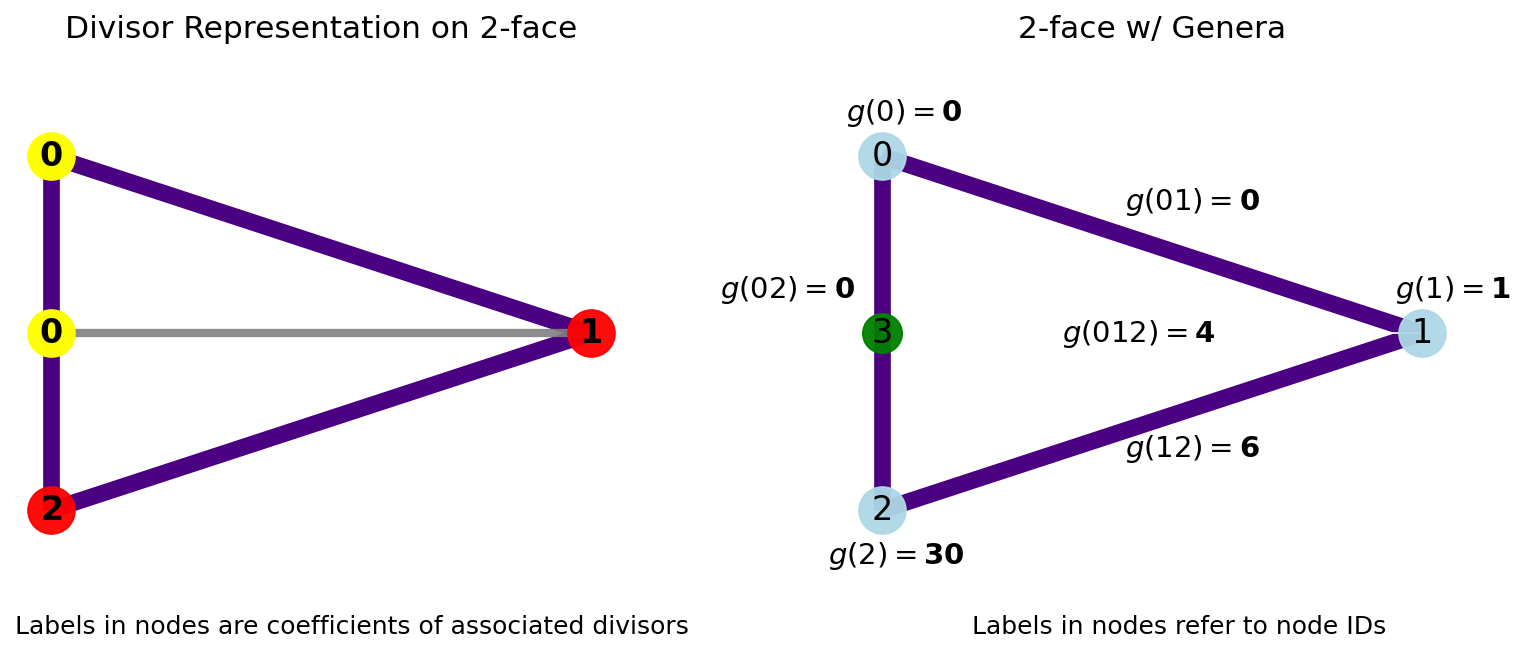

In [737]:
hvecs_exface1((0,1,2,0))

# 3. Dependencies

In [530]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p numpy,pandas,networkx,matplotlib.pyplot,IPython.display,watermark

# date
print (" ")
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.6.6
IPython 7.13.0

numpy 1.18.2
pandas 1.0.3
networkx 2.4
matplotlib.pyplot 3.2.1
IPython.display 7.13.0
watermark 2.0.2

compiler   : GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)
system     : Darwin
release    : 19.0.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
 
last updated: Tue Apr 14 2020 02:44:54 EDT
